# Laboratorio 7: Clasificación 🤗

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>


### Cuerpo Docente:

- Profesores: Ignacio Meza, Sebastián Tinoco
- Auxiliares: Catherine Benavides y Consuelo Rojas
- Ayudante: Nicolás Ojeda, Eduardo Moya

### **Equipo:**

- Pia Antiquera.
- Evelyn Silva.




### **Link de repositorio de GitHub:** `https://github.com/piaantiquera/Courses-MDS7202.git`

### Temas a tratar
- Clasificación en problemas desbalanceados
- Lightgbm y xgboost
- Pipelines

### Reglas:

- **Grupos de 2 personas**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.
- Código que no se pueda ejecutar, no será revisado.



### Objetivos principales del laboratorio
- Comprender cómo trabajar con problemas de clasificación con clases desbalanceadas.
- Aplicar los modelos lightgbm y xgboost.
- Practicar Pipelines

# Parte Teórica [12 puntos]




1. Explique cuál es la diferencia entre los datos de entrenamiento y validación. [1 punto]

2. Explique cuál es el principal desafío al trabajar problemas de clasificación con data no supervisada. [1 punto]

3. Explique en **sus palabras** qué es la matriz de confusión y para qué se utiliza. [1 puntos]

4. Escriba la fórmula de las siguientes métricas y explique con **sus palabras** cómo se interpretan. [1 punto cada uno]

  * Accuracy
  * Precision
  * Recall
  * F1 score

5. Explique qué métrica recomendaría para los siguientes contextos de clasificación. [1 punto cada uno]

  * Mantenimiento predictivo de fallas de maquinaria pesada en la industria minera.  
  * Detección de enfermedades altamente contagiosas.
  * Aprobación de créditos de alto riesgo.
  * Detección de crímenes.

6. Explique qué es la calibración de modelos y para qué se usa. [1 punto]


**Respuesta:**

*Escriba su respuesta aquí*

# Parte práctica [48 puntos]

<p align="center">
  <img src="https://drive.google.com/uc?export=view&id=1BnO4tyh3vM2P199Ec9s3JjngQ4qQ9seP"
" width="300">
</p>


Tras el trágico despido de la mítica mascota de Maipú, Renacín decide adentrarse como consultor en el mercado futbolero, el cuál (para variar...) está cargado en especulaciones.

Como su principal tarea será asesorar a los directivos de los clubes sobre cuál jugador comprar y cuál no, Renacín desea generar modelos predictivos que evaluén distintas características de los jugadores; todo con el fin de tomar decisiones concretas basadas en los datos.

Sin embargo, su condición de corporeo le impidió tomar la versión anterior de MDS7202, por lo que este motivo Renacín contrata a su equipo para lograr su objetivo final. Dado que aún tiene fuertes vínculos con la dirección de deportes de la municipalidad, el corporeo le entrega base de datos con las estadísticas de cada jugador para que su equipo empieze a trabajar ya con un dataset listo para ser usado.


**Los Datos**

Para este laboratorio deberán trabajar con el csv `statsplayers.csv`, donde deberán aplicar algoritmos de aprendizaje supervisado de clasificación en base a características que describen de jugadores de fútbol.

Para comenzar cargue el dataset señalado y a continuación vea el reporte **`Player_Stats_Report.html`** (adjunto en la carpeta del enunciado) que describe las características principales del `DataFrame`.

In [18]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except:
    print('Ignorando conexión drive-colab')

Ignorando conexión drive-colab


In [69]:
!pip install --upgrade lightgbm

In [71]:
!pip install --upgrade pandas

In [31]:
!pip install lightgbm

  Using cached lightgbm-4.3.0.tar.gz (1.7 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for lightgbm: filename=lightgbm-4.3.0-py3-none-macosx_12_0_arm64.whl size=1389938 sha256=8cc60a0be0afab9a23e5cce67a6e131859dcab46fd2d5c7e43f29ded2b3264a8
  Stored in directory: /Users/piaal/Library/Caches/pip/wheels/f4/d1/f4/3cd66516e5a05b0879846879dfb06e5a087f453adb405a5999
Successfully built lightgbm


In [73]:
!pip install --upgrade dask

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 4.1 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: dask
    Found existing installation: dask 2.30.0
    Uninstalling dask-2.30.0:
      Successfully uninstalled dask-2.30.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dataprep 0.4.1 requires dask[array,dataframe,delayed]<3.0,>=2.25, but you have dask 2024.5.1 which is incompatible.
dataprep 0.4.1 requires jinja2<3.0,>=2.11, but you have jinja2 3.1.2 which is incompatible.
dataprep 0.4.1 requires pandas<2.0,>=1.1, but you have pandas 2.2.2 which is incompatible.
dataprep 0.4.1 requires regex<2021.0.0,>=2020.10.15, but you have regex 2024.5.10 which is incompatible.


In [278]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as ltb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')


In [284]:
# Importacion de datos
df = pd.read_csv('stats_players.csv')
df2 = df.copy()

## 1. Predicción de Seleccionados Nacionales [14 puntos]

<p align="center">
  <img src="https://www.futuro.cl/wp-content/uploads/2016/06/chile-argentina-meme-12.jpg" width="300">
</p>



### 1.1 Preprocesamiento [5 puntos]

Tareas:

1. Genere los labels para la clasificación binaria en una variable llamada `label`. Para esto, trabaje sobre el atributo `National_Position` suponiendo que los valores nulos son jugadores no seleccionados para representar a su país. [Sin puntaje]

2. Hecho esto, ¿cuántos se tienen ejemplos por cada clase? Comente lo que observa. [1 punto]

3. Genere un `ColumnTransformer` en donde especifique las transformaciones que hay que realizar para cada columna (por ejemplo StandarScaler, MinMaxScaler, OneHotEncoder, etc...) para que puedan ser utilizadas correctamente por el modelo predictivo y guárdelo una variable llamada `col_transformer`. [2 puntos]

4. Comente y justifique las transformaciones elegidas sobre cada una de las variables (para esto utilice el material `Player_Stats_Report.html` que viene en el zip del lab), al igual que las transformaciones aplicadas. [2 puntos]

**Respuesta:**

In [280]:
# ----------------------------------------------------------------------------------------------------------------------------
# 1. Generacion de etiquetas
df['label'] = df['National_Position'].apply(lambda x: 1 if pd.notnull(x) else 0)

# ----------------------------------------------------------------------------------------------------------------------------
# 2. Conteo de registros por clase
count_per_label = df['label'].value_counts()
print("Cantidad de registros por clase:")
print(count_per_label)

# ----------------------------------------------------------------------------------------------------------------------------
# 3. Generación de ColumnTransformer
tipos_de_datos = df.dtypes
print("\nTipos de datos de las columnas:")
print(tipos_de_datos)

df.reset_index(drop=True, inplace=True)

# Separar características y etiqueta
y = df['label']
df = df.drop(columns=['label', 'National_Position', 'Name'])

cols_to_scale_and_norm = ['Height', 'Weight','Age', 'Ball_Control', 'Dribbling', 'Marking', 'Sliding_Tackle', 'Standing_Tackle', 'Aggression', 'Reactions', 'Interceptions', 
                'Vision', 'Composure', 'Crossing', 'Short_Pass', 'Long_Pass', 'Acceleration', 'Speed', 'Stamina', 'Strength',
                  'Balance', 'Agility', 'Jumping', 'Heading', 'Shot_Power', 'Finishing', 'Long_Shots', 'Curve', 'Freekick_Accuracy', 
                    'Penalties', 'Volleys' ]
cols_to_code = ['Nationality', 'Preffered_Foot', 'Club_Position', 'Work_Rate', 'Weak_foot', 'Skill_Moves']
cols_to_ord = ['Skill_Moves', 'Weak_foot', 'Ball_Control']      
    
column_transformer = ColumnTransformer(
    transformers=[ 
        ('to_scale', StandardScaler(), cols_to_scale_and_norm ),
        ('to_norm', PowerTransformer(), cols_to_scale_and_norm),
        ('no-code', OneHotEncoder(handle_unknown='ignore'), cols_to_code)
    ], remainder='passthrough'
)

Cantidad de registros por clase:
label
0    16513
1     1075
Name: count, dtype: int64

Tipos de datos de las columnas:
Name                 object
Nationality          object
National_Position    object
Club_Position        object
Height                int64
Weight                int64
Preffered_Foot       object
Age                   int64
Work_Rate            object
Weak_foot             int64
Skill_Moves           int64
Ball_Control          int64
Dribbling             int64
Marking               int64
Sliding_Tackle        int64
Standing_Tackle       int64
Aggression            int64
Reactions             int64
Interceptions         int64
Vision                int64
Composure             int64
Crossing              int64
Short_Pass            int64
Long_Pass             int64
Acceleration          int64
Speed                 int64
Stamina               int64
Strength              int64
Balance               int64
Agility               int64
Jumping               int64
Heading     

```
2. A partir de la cantidad de registros por clase, notamos que se tiene un evidente desbalance de clases dado que aproximadamente el 93% de los datos corresponde a la variable 0 (No esta asociado a una posición en un equipo nacional). Lo anterior, es 

4. Para las transformaciones realizadas, se tuvieron las siguientes consideraciones:
- Las columnas en 'cols_to_esc' corresponden a aquellas columnas númericas que tienen valores en escalas o rangos de valores distintos entre sí. 
- Las columnas en 'cols_to_norm' corresponden a aquellas columnas númericas que presentan una distribución de valores distinta a la distribución normal.
- Las columnas en 'cols_to_code' corresponden a aquellas columnas categóricas de tipo object que requieren ser codificadas a tipo númerico para que puedan ser interpretadas por los modelos que se van a implementar.
- También se consideran 'cols_to_ord' corresponden a aquellas columnas categóricas de tipo object donde sus categorías representan algún tipo de ''orden'' inherente o jerarquía en sus categorias lo que le podría otorgar una información adicional al modelo.

Algunas columnas no se consideran en ningun paso de colum_transformer tales como la columna label (dado que es una variable binaria), y la columna 'Name' (dado que la cantidad de valores unicas provoca que tenga un comportamiento similar a un ID, por lo que no entrega nueva información al modelo).

Por otro lado, solo la columna 'National_Position' tiene una cantidad significativa de valores nulos, sin embargo, no es necesario considerar una transformación como ('imputer', SimpleImputer(strategy='constant', fill_value='No tiene')) dado que posteriormente esta columna no es util por la creación de la nueva columna 'label'.

En relación a las demás columnas, no se observan cantidad de registros nulos o atípicos significativo como para requerir una transformación específica en este aspecto.

```


### 1.2 Entrenamiento [3 puntos]

Ahora, vamos a entrenar los pipelines generados en los pasos anteriores. Para esto, debe realizar las siguientes tareas:

1. Separe los datos de entrenamiento en un conjunto de entrenamiento y de prueba  (la proporción queda a su juicio). En este paso, seleccione los ejemplos de forma aleatoria e intente mantener la distribución original de labels de cada clase en los conjuntos de prueba/entrenamiento. (vea la documentación de `train_test_split`). [1 puntos]


2. Defina un pipeline llamado `pipeline_xgboost` y otro llamado `pipeline_lightgbm`. Estos pipelines deben tener el mismo ColumnTransformer definido en la sección de preprocesamiento, pero deben variar los clasificadores de acuerdo al nombre de cada pipeline. [1 puntos]

3. Entrene los pipelines. [1 punto]



**Respuesta:**

In [281]:
# ----------------------------------------------------------------------------------------------------------------------------
# 1. Separación en subconjuntos de entrenamiento y testeo.
df.reset_index(drop=True)
# El parámetro stratify permite que las proporciones de las clases en el conjunto de datos original se mantenga en los subconjuntos de entrenamiento y testeo.
X_train, X_test, y_train, y_test = train_test_split(df,y, test_size=0.3, random_state=0, stratify=y)

# ----------------------------------------------------------------------------------------------------------------------------
# 2. Definicion de pipelines
pipeline_xgboost = Pipeline([('column_transformer', column_transformer), ('clf', GradientBoostingClassifier())])
pipeline_lightbm = Pipeline([('column_transformer', column_transformer),('clf', ltb.LGBMClassifier())])

# ----------------------------------------------------------------------------------------------------------------------------
# 3. Entrenamiento de pipelines
# Pipeline XGBOOST
xgboost_fit = pipeline_xgboost.fit(X_train, y_train)
xgboost_predict = xgboost_fit.predict(X_test)

# Pipeline XGBOOST
lgbm_fit = pipeline_lightbm.fit(X_train, y_train)
lgbm_predict = lgbm_fit.predict(X_test)


[LightGBM] [Info] Number of positive: 752, number of negative: 11559
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000903 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5110
[LightGBM] [Info] Number of data points in the train set: 12311, number of used features: 179
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.061084 -> initscore=-2.732483
[LightGBM] [Info] Start training from score -2.732483


### 1.3 Resultados [6 puntos]

1. Calcule las métricas accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional) para evaluar el rendimiento de los distintos modelos. Verifique sus resultados usando `classification_report`. [2 puntos]

2. Explique qué implican los valores de accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional) y cómo influye la cantidad de ejemplos por clase en los resultados obtenidos. [2 puntos]

3. Explique qué métrica le parece más adecuada y concluya qué modelo tiene un mejor desempeño. [2 puntos]

**Respuesta:**

XGBOOST - Precision: 0.68
XGBOOST - Recall: 0.25
XGBOOST - Accuracy: 0.95
REPORT METRICS XGBOOST 

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      4954
           1       0.68      0.25      0.37       323

    accuracy                           0.95      5277
   macro avg       0.82      0.62      0.67      5277
weighted avg       0.94      0.95      0.94      5277

LightGBM - Precision: 0.69
LightGBM - Recall: 0.37
LightGBM - Accuracy: 0.95
REPORT METRICS LIGHTBM 

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      4954
           1       0.69      0.37      0.48       323

    accuracy                           0.95      5277
   macro avg       0.82      0.68      0.73      5277
weighted avg       0.94      0.95      0.94      5277



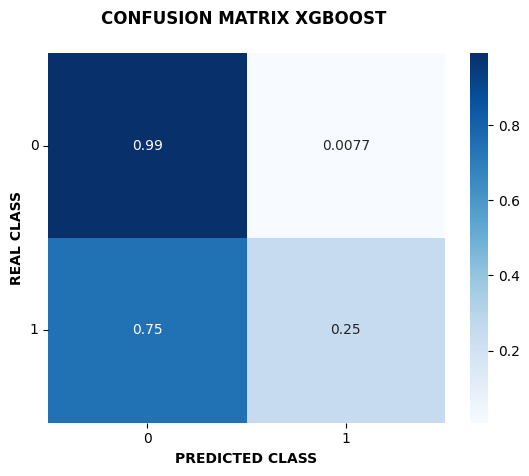

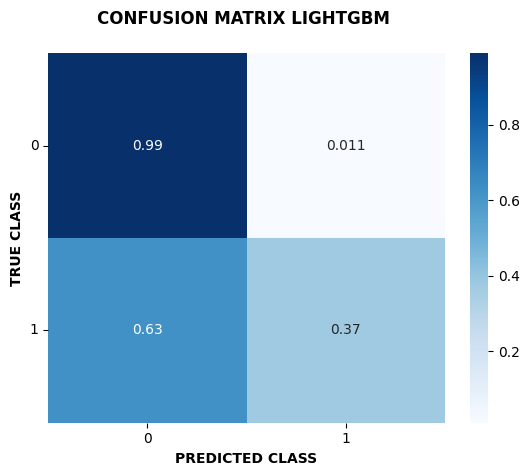

In [282]:
# ----------------------------------------------------------------------------------------------------------------------------
# 1. Cálculo de métricas y verificación
# Calcular métricas para XGBOOST
accuracy_xgb = accuracy_score(y_test, xgboost_predict)
precision_xgb = precision_score(y_test, xgboost_predict, pos_label=1) 
recall_xgb = recall_score(y_test, xgboost_predict, pos_label=1)

print(f"XGBOOST - Precision: {precision_xgb:.2f}")
print(f"XGBOOST - Recall: {recall_xgb:.2f}")
print(f"XGBOOST - Accuracy: {accuracy_xgb:.2f}")

print('REPORT METRICS XGBOOST \n')
print(classification_report(y_test, xgboost_predict))

# Calcular métricas para LightGBM
accuracy_lgbm = accuracy_score(y_test, lgbm_predict)
precision_lgbm = precision_score(y_test, lgbm_predict, pos_label=1) 
recall_lgbm = recall_score(y_test, lgbm_predict, pos_label=1)


print(f"LightGBM - Precision: {precision_lgbm:.2f}")
print(f"LightGBM - Recall: {recall_lgbm:.2f}")
print(f"LightGBM - Accuracy: {accuracy_lgbm:.2f}")

print('REPORT METRICS LIGHTBM \n')
print(classification_report(y_test, lgbm_predict))

# ----------------------------------------------------------------------------------------------------------------------------
# Además, también se incluyen las respectivas matrices de confusión para cada uno de los modelos para permitir una mejor interpretación de sus resultados.
xgboost_matrix = confusion_matrix(y_test, xgboost_predict, normalize='true')
classes_xgboost = unique_labels(y_test, xgboost_predict)
df_xgboost = pd.DataFrame(xgboost_matrix, index=classes_xgboost, columns=classes_xgboost)
map = sns.heatmap(df_xgboost, annot=True, cmap="Blues")
map.set_yticklabels(map.get_yticklabels(), rotation=0)
plt.title('CONFUSION MATRIX XGBOOST \n', fontweight='bold')
plt.xlabel('PREDICTED CLASS', fontweight='bold')
plt.ylabel('REAL CLASS', fontweight='bold')
plt.autoscale()
plt.show()



lgbm_matrix = confusion_matrix(y_test, lgbm_predict, normalize='true')
classes_lgbm = unique_labels(y_test, lgbm_predict)
df_lgbm = pd.DataFrame(lgbm_matrix, index=classes_lgbm, columns=classes_lgbm)
map = sns.heatmap(df_lgbm, annot=True, cmap="Blues")
map.set_yticklabels(map.get_yticklabels(), rotation=0)
plt.title('CONFUSION MATRIX LIGHTGBM \n', fontweight='bold')
plt.xlabel('PREDICTED CLASS', fontweight='bold')
plt.ylabel('TRUE CLASS', fontweight='bold')
plt.autoscale()
plt.show()

```
2. Para la clase positiva, se tiene:
- Un alto exactitud (accuracy) indica que el modelo esta clasificando correctamente las clases cuando la data esta balanceada.
- Una alta precisión indica que, de los jugadores que el modelo clasifica como seleccionados nacionales, la mayoría realmente lo son.
- Una alta sensibilidad (recall) indica una alta proporción de verdaderos positivos para la clase de seleccionados.

3. En este caso, para definir la métrica mas adecuada sabemos que la exactitud no es la mejor considerando que existe un desbalance considerable en las clases, por lo tanto no es una representación fiel del rendimiento del modelo. Por otro lado, en relación a la precisión y sensibilidad, la mas adecuada se puede definir en relación a "que es lo que importa mas"  en el contexto de la clasificación, si un falso positivo o un falso negativo.

Por un lado, un falso positivo corresponde a cuando un jugador que es clasificado como seleccionado en realidad no lo es, lo que podría conllevar a costos por este error ante la probabilidad de 'considerar' a un jugador como seleccionado cuando en realidad no estaba preparado.

Por otro lado, falso negativo por otro lado, corresponde a cuando un jugador que no es clasificado como seleccionado en realidad si lo era, lo que igualmente podría conllevar a costos por este error ante la probabilidad de ''desaprovechar'' el potencial del jugador como seleccionado.

En este caso, podriamos decir asumir sería mas costoso para el equipo si no incluye a un jugador de calidad (seleccionado), por lo tanto nos importaría mas clasificar como seleccionado a aquellos que realmente son seleccionados, por lo tanto, la sensibilidad resultaria como una métrica adecuada. 

Sin embargo, en general, bueno considerar el f1-score como un ''trade-off'' entre estas dos métricas como un mejor reflejo del rendimiento del modelo.

Considerando esto, se podría determinar que el modelo con **LightGBM** dado que tiene un mayor recall para la clase 'seleccionado'.

```


## 2. Predicción de posiciones de jugadores [4 puntos]

<p align="center">
  <img src="https://pbs.twimg.com/media/E1rfA1aWEAYU6Ny.jpg" width="300">
</p>

En una nueva jornada de desmesuradas transacciones deportivas, Renacín escuchó a sus colegas discutir acerca de que el precio de cada jugador depende en gran medida de la posición en la cancha en la que juega. Y además, que hay bastantes jugadores nuevos que no tienen muy claro en que posición verdaderamente brillarían, por lo que actualmente puede que actualmente estén jugando en posiciones sub-optimas.

Viendo que los resultados del primer análisis no son tan esperanzadores, el corporeo los comanda a cambiar su tarea: ahora, les solicita que construyan un clasificador enfocado en predecir la mejor posición de los jugadores en la cancha según sus características.

Para lograr esto, primero, les pide que etiqueten de la siguiente manera los valores que aparecen en el atributo `Club_Position`, pidiendo que agrupen los valores en los siguientes grupos:

**Nota**:  Renacín les recalca que **no deben utilizar los valores ```Sub``` y ```Res``` de esta columna**.

```python
ataque = ['ST', 'CF']
central_ataque = ['RW', 'CAM', 'LW']
central = ['RM', 'CM', 'LM']
central_defensa = ['RWB', 'CDM', 'LWB']
defensa = ['RB', 'CB', 'LB']
arquero = ['GK']
```

La elección del clasificador se justificar en base a la siguiente [guía](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) y se deben comentar los resultados obtenidos en la clasificación.

**Tareas:** [1 punto por tarea]

1. Aplique las etiquetas descritas anteriormente en cada uno de los valores señalados en esta sección.
2. Cuente cuántos por clase quedan.
3. Entrene el nuevo pipeline y ejecute una evaluación de este.  
4. Comente los resultados obtenidos.

**Respuesta:**


Conteo de valores por clase en la columna 'Posicion':
Posicion
defensa            1180
central             907
arquero             632
central_ataque      581
ataque              430
central_defensa     209
Name: count, dtype: int64


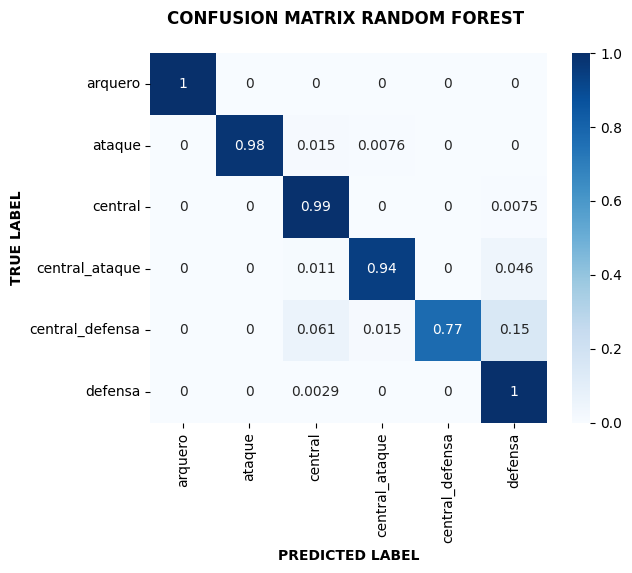

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       197
           1       1.00      0.98      0.99       132
           2       0.97      0.99      0.98       265
           3       0.99      0.94      0.96       174
           4       1.00      0.77      0.87        66
           5       0.95      1.00      0.97       348

    accuracy                           0.97      1182
   macro avg       0.98      0.95      0.96      1182
weighted avg       0.97      0.97      0.97      1182



In [288]:
# ----------------------------------------------------------------------------------------------------------------------------
# 1. Aplicar etiquetas
posiciones = {
    "ataque": ['ST', 'CF'],
    "central_ataque": ['RW', 'CAM', 'LW'],
    "central": ['RM', 'CM', 'LM'],
    "central_defensa": ['RWB', 'CDM', 'LWB'],
    "defensa": ['RB', 'CB', 'LB'],
    "arquero": ['GK']
}

posiciones_invertidas = {}
for key, values in posiciones.items():
    for value in values:
        posiciones_invertidas[value] = key

# Función para mapear las posiciones
def map_position(club_position):
    return posiciones_invertidas.get(club_position, np.nan)  # Devuelve 'Unknown' si no encuentra la posición

# Crear la nueva columna 'Posicion'
df2['Posicion'] = df2['Club_Position'].apply(map_position)

df2 = df2.dropna(subset=['Posicion'])

# ----------------------------------------------------------------------------------------------------------------------------
# 2. Conteo de cantidad de valores por clase en la columna 'Posicion'
conteo_clases = df2['Posicion'].value_counts()
print("\nConteo de valores por clase en la columna 'Posicion':")
print(conteo_clases)



# ----------------------------------------------------------------------------------------------------------------------------
# 3. Nuevo pipeline
df2.drop(columns = ['Name'])

cols_to_scale_and_norm = ['Height', 'Weight','Age', 'Ball_Control', 'Dribbling', 'Marking', 'Sliding_Tackle', 'Standing_Tackle', 'Aggression', 'Reactions', 'Interceptions', 
                'Vision', 'Composure', 'Crossing', 'Short_Pass', 'Long_Pass', 'Acceleration', 'Speed', 'Stamina', 'Strength',
                  'Balance', 'Agility', 'Jumping', 'Heading', 'Shot_Power', 'Finishing', 'Long_Shots', 'Curve', 'Freekick_Accuracy', 
                    'Penalties', 'Volleys' ]
cols_to_code = ['Nationality', 'Preffered_Foot', 'Club_Position', 'Work_Rate', 'Weak_foot', 'Skill_Moves']

column_transformer = ColumnTransformer(
    transformers = [('no-escalado', MinMaxScaler(), cols_to_scale_and_norm),
                      ('no-normal', PowerTransformer(), cols_to_scale_and_norm),
                      ('no-interp', OneHotEncoder(handle_unknown='ignore'),cols_to_code)])

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df2['Posicion'])


pipeline_rf = Pipeline([('column_transformer', column_transformer), ('clf',  RandomForestClassifier())])

df2.reset_index(drop=True)
X_train, X_test, y_train, y_test = train_test_split(df2, y_encoded, test_size=0.3, random_state=0)


rf_fit = pipeline_rf.fit(X_train, y_train)
rf_predict = rf_fit.predict(X_test)
rf_matrix = confusion_matrix(y_test, rf_predict, normalize='true')
classes_rf = unique_labels(df2['Posicion'])

df = pd.DataFrame(rf_matrix, index=classes_rf, columns=classes_rf)

map = sns.heatmap(df, annot=True, cmap="Blues")
map.set_yticklabels(map.get_yticklabels(), rotation=0)

plt.title('CONFUSION MATRIX RANDOM FOREST \n', fontweight='bold')
plt.xlabel('PREDICTED LABEL', fontweight='bold')
plt.ylabel('TRUE LABEL', fontweight='bold')
plt.autoscale()
plt.show()

print(classification_report(y_test, rf_predict))


```
4. A partir de los resultados obtenidos podemos notar que el modelo presenta un buen rendimiento a modo general. En particular, se destaca  una precisión absoluta en algunas posiciones especificas tales como defensa y arquero.
```



## 3. Predicciones de Seleccionados Nacionales para el Jere Klein [30 puntos]

<center>
<img src='https://www.radioactiva.cl/wp-content/uploads/2024/04/Jere-Klein-1-768x432.webp' width=500 />

Después de alcanzar la fama como cantante urbano, Jere Klein decide explorar una nueva faceta. Con su amor por el fútbol y convencido de que los artistas urbanos poseen un talento y versatilidad excepcionales, Jere se embarca en un proyecto innovador: desarrollar un sistema de inteligencia artificial capaz de identificar a jugadores que tienen potencial para convertirse en futbolistas profesionales. Su teoría es que muchos artistas del género urbano chileno, con sus habilidades únicas y su disciplina, podrían destacarse también en el deporte. Con este sistema, Jere espera no solo abrir nuevas oportunidades para sus colegas artistas, sino también demostrar la amplia gama de talentos que pueden ofrecer.

### 2.1 ¿Qué modelo de árbol es más de "pana"? [10 puntos]

<center>
<img src='https://64.media.tumblr.com/39189215a7d3d96823cb359f35b44e05/tumblr_psmrhrR3Xw1qf5hjqo4_540.gif' width=300 />


**Tareas**


1. Considerando el la variable llamada `label` creada en la sección 1.1. Para determinar cuál modelo de árbol sería más adecuado para la tarea en cuestión, utilice PyCaret. Este deberá centrarse exclusivamente en modelos de tipo árbol. Jere ha especificado que busca un modelo que tome decisiones rápidamente y que tenga una baja tasa de falsos positivos, ya que planea invertir en estos jugadores. [3 puntos] Para la comparación, utilice los siguientes modelos:

```python
['et', 'rf', 'dt', 'xgboost', 'lightgbm', 'catboost']
```

3. Explique en brevemente que son los modelos de la siguiente lista `['et', 'rf', 'dt']` y como funcionan. [3 punto]

4. Tras realizar la comparación de modelos, seleccione aquel que muestre el mejor rendimiento en términos de velocidad y precisión, especialmente en la reducción de falsos positivos. Utilice la función `evaluate_model` de PyCaret para revisar y analizar los resultados obtenidos en los siguientes aspectos:

  - **Confusión Matrix**: ¿Cómo se encuentran la tasa de verdaderos positivos y verdaderos negativos?
  - **Threshold**: ¿Es acaso el umbral por defecto del modelo el mejor para las predicciones?
  - **Feature Importance**: ¿Cuáles son las variables con mejor desempeño? ¿A qué podría deberse esto?
  - **Learning Curve**: ¿El modelo presenta algún problema?

  [4 puntos]

**Respuesta**

```
3.
- **Random Forest (RF)** es un algoritmo que construye múltiples árboles de decisión durante el entrenamiento. Cada árbol se entrena con un subconjunto aleatorio de features, y la predicción final se calcula promediando las predicciones de todos los árboles en el caso de regresión o tomando la moda de las predicciones para clasificación.

- **Decision tree (DT)** es un algoritmo que utiliza un árbol de decisiones para hacer predicciones basadas en un conjunto de datos. Divide el conjunto de datos en subconjuntos cada vez más pequeños basados en diferentes features y cada nodo interno del árbol representa una feature mientras que cada hoja representa un ''resultado''. Se construye seleccionando la mejor característica para dividir el conjunto de datos en cada paso en base a la optimización de medidas  como la ganancia de información o la impureza de Gini.

- **Extra Trees (ET)** es una extensión de Random Forest con la diferencia en cómo se seleccionan los umbrales para dividir los nodos: Random Forest elige los mejores umbrales posibles mientras que Extra Trees selecciona umbrales aleatorios. Esto hace que Extra Trees sea más rápido de entrenar que Random Forest, aunque a cambio de una pérdida en la precisión.

```

### 2.2 Reducción de dimensionalidad [14 puntos]

<center>
<img src='https://i.kym-cdn.com/photos/images/original/002/258/560/668.gif' width=400 />

A pesar de los resultados obtenidos previamente, el manager de Jere ha solicitado el entrenamiento de un modelo de XGBoost utilizando los datos disponibles. Además, se debe proceder a realizar una reducción de dimensionalidad basada en la importancia de las características.

Para llevar a cabo esta tarea:

1. Inicie entrenando un modelo XGBoost con todas las características disponibles. [2 puntos]

2. Una vez el modelo esté entrenado, evalúe y clasifique las características según su importancia de forma descendente. [2 puntos]

3. Utilice esta clasificación para ejecutar una búsqueda recursiva de eliminación de características, eliminando progresivamente las menos importantes y evaluando el impacto en el desempeño del modelo hasta identificar las N características más críticas. [2 puntos]

4. Con este conjunto reducido de características, entrene un nuevo modelo y evalúe su rendimiento. [2 puntos]

5. Posteriormente, responda a las siguientes preguntas para una comprensión más profunda de los cambios y beneficios:

  - ¿El rendimiento del modelo con las características seleccionadas es similar al del modelo original? ¿Cómo se comparan en términos de precisión y robustez? [2 puntos]
  - ¿Cuáles son los beneficios potenciales de eliminar variables del modelo? Considere factores como la simplificación del modelo, reducción del tiempo de entrenamiento, y mejora en la capacidad de generalización. [2 puntos]
  - Comente si el modelo con menor dimensionalidad es más sencillo de explicar. Explique brevemente por qué la eliminación de ciertas características puede facilitar la comprensión y la explicación del comportamiento del modelo. [2 puntos]

Notar que con esta metodologia buscamos encontrar un punto entermedio entre número de festures y desempeño. por esto, si observa que al aumentar festires el aumento es despreciable, puede no considerar agregar más features a su modelo.

**Respuesta**

### 2.3 Calibración Probabilistica [6 puntos]

<center>
<img src='https://media2.giphy.com/media/l2Je4Ku0Cx292KWv6/200w.gif?cid=6c09b952y0sihtq9tb6sz8j2023x3zxxp3qx1ocgonkpkblj&ep=v1_gifs_search&rid=200w.gif&ct=g' width=400 />

Para lograr modelos más modulares, se recomienda realizar una calibración del modelo entrenado anteriormente, con el objetivo de obtener salidas que reflejen mayor modularidad.

1. Se solicita que utilice un método de calibración que asegure que las probabilidades generadas incrementen de manera monótona. Una métrica ampliamente utilizada para evaluar la precisión de la calibración de un modelo es el Brier Score. Calcule el Brier Score para el modelo tanto antes como después de la calibración. Esto le permitirá realizar una comparación cuantitativa y determinar si la calibración ha mejorado el rendimiento del modelo. Para más información sobre el Brier Score, puede consultar el siguiente enlace: [Scikit-Learn - Brier Score Loss](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.brier_score_loss.html). [3 puntos]

2. Tras la calibración, examine y comente los resultados obtenidos. A su análisis añada una comparación visual de las ideales versus las salidas del modelo original (sin calibrar) y del modelo calibrado. [3 puntos]

**Respuesta**